In [1]:
import numpy as np
import time
from glob import glob
import matplotlib.pyplot as plt

## Redefine some basic quantities

In [2]:
# Define the wavenumber and angular frequency axis 
k0=0.02; kxmin=0.005; kxmax=0.037; Nkx=150
kx=np.linspace(kxmin,kxmax,Nkx)
g=9.81
omega=np.sqrt(g*kx)

# Calculate the wavenumber increment
dkx=np.zeros(Nkx,float)
for n in range(Nkx-1):
    dkx[n]=kx[n+1]-kx[n]
dkx[Nkx-1]=dkx[Nkx-2]

# Define the group size at focus
L=(5)*(k0)**-1

# Calculate the group spectrum and associated amplitudes
G=L*((2*np.pi)**-0.5)*np.exp(-(L**2)*0.5*(kx-k0)**2)
A0=5
a=A0*G*dkx/np.sum(G*dkx)

# Uniform phase
#phi0=DANSLENOMDUFICHIER
#phi=phi0*np.ones(Nkx)

# Derive some quantities related to derivatives of omega at k0
cg0=(np.sqrt(g/k0))*(0.5)
par2om=(np.sqrt(g*k0)/(k0**2))*(-0.25)
tau=L**2/par2om

# Define the temporal and spatial axis
dt=0.13*2*np.pi/np.max(omega)
Nt=2*int(np.abs(tau)/dt)
t=np.linspace(-dt*Nt,0,Nt)

Lx=4*(2*np.pi/k0)
dx=0.000015*2*np.pi/kxmax
Nx=int(Lx/dx+2)
x=np.linspace(-Lx/2,Lx/2,Nx)

#---------------------------------------------------#

Spread_x=np.sqrt(L**2+(L**(-2))*(par2om*t)**2)
c0=(np.sqrt(g/k0))
ccr_1ord=cg0+0.5*k0*par2om-c0
ccr_grad_1ord=(-c0+cg0)*k0*t/tau
ccr_2ord=c0-cg0-0.5*k0*par2om
ccr_grad_2ord=k0*(1.5*par2om*k0+4*c0-4*cg0)*t/tau
ccr_lapl_2ord=2*((c0-cg0+0.5*k0*par2om)*(t/tau)**2-0.5*k0*par2om)*(k0)**2
c_grad_expect=ccr_grad_1ord[:-2]/((k0*Spread_x[:-2])**2)+0.5*ccr_grad_2ord[:-2]/((k0*Spread_x[:-2])**4)

#---------------#

nstart1=0
nstart2=166
nend=Nt-3

In [4]:
dx,dt,2*tau*c0*k0/(2*np.pi)

(0.0025472372866944273, 1.3557757290224051, -31.830988618379074)

## Load the data

In [7]:
## Remind the way the files were stored !
#np.savez('GWP_2D_Lk05_phi%.5f' % phi0,tfoc1=tfoc1,tau_abs1=tau_abs1
#         ,A_ratio1=A_ratio1,L1=L1,tfoc2=tfoc2,tau_abs2=tau_abs2,A_ratio2=A_ratio2,L2=L2,
#         cov1_00=cov1[:,0,0],cov1_11=cov1[:,1,1],cov1_10=cov1[:,1,0],cov1_01=cov1[:,0,1],
#         cov2_00=cov2[:,0,0],cov2_11=cov2[:,1,1],cov2_10=cov2[:,1,0],cov2_01=cov2[:,0,1])


In [8]:
# Call all the files
fnames = glob('GWP_2D_Lk05_phi*.npz')
fnames.sort()
Nfi=len(fnames)

In [9]:
Nfi

1647

In [10]:
fnames[-1],fnames[0]

('GWP_2D_Lk05_phi3.13944.npz', 'GWP_2D_Lk05_phi-0.00030.npz')

In [11]:
# Read one file
data=np.load(fnames[-1])

In [12]:
data['tfoc1'][0:50]

array([   0.        ,    0.        ,    0.        , -178.91128972,
       -108.1382354 ,  -25.89168475,  -43.82592261,  -47.8798994 ,
        -31.7652743 ,  -43.22793901,  -31.07119165,  -21.99122683,
        -31.33785897,  -34.56478926,  -25.78110564,  -22.12363098,
        -22.32703743,  -24.13845896,  -23.68887385,  -21.47261085,
        -22.54147459,  -21.74496647,  -24.07329005,  -24.52346386,
        -24.08377318,  -22.47511571,  -22.17537192,  -20.34728255,
        -21.89580858,  -21.49739849,  -21.44995097,  -21.50252329,
        -21.03047814,  -21.38989365,  -20.615609  ,  -19.20208962,
        -19.82334845,  -20.25892647,  -20.29431348,  -20.76676407,
        -20.28681592,  -20.62045239,  -20.62245189,  -19.73207228,
        -20.27441664,  -20.0554631 ,  -20.74335213,  -20.55562709,
        -20.81479651,  -20.56121937])

In [13]:
len(data['tfoc1']),len(data['tau_abs1']),len(data['A_ratio1']),len(data['L1'])

(329, 329, 329, 329)

In [14]:
# Concatenate  output results

# Initialize
TFOC1=np.zeros((Nfi,Nt-3))
TAUABS1=np.zeros((Nfi,Nt-3))
ARATIO1=np.zeros((Nfi,Nt-3))
LL1=np.zeros((Nfi,Nt-3))
TFOC2=np.zeros((Nfi,Nt-3))
TAUABS2=np.zeros((Nfi,Nt-3))
ARATIO2=np.zeros((Nfi,Nt-3))
LL2=np.zeros((Nfi,Nt-3))

# Read
for n in range(Nfi):
    data=np.load(fnames[n])
    TFOC1[n,:]=data['tfoc1']
    TAUABS1[n,:]=data['tau_abs1']
    ARATIO1[n,:]=data['A_ratio1']
    LL1[n,:]=data['L1']
    TFOC2[n,:]=data['tfoc2']
    TAUABS2[n,:]=data['tau_abs2']
    ARATIO2[n,:]=data['A_ratio2']
    LL2[n,:]=data['L2']

## Plot

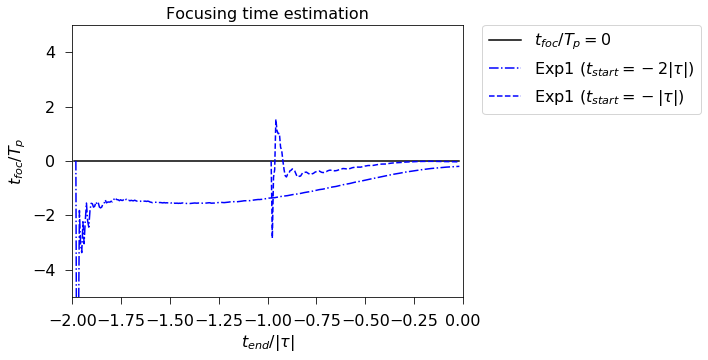

In [15]:
# Avec un seul fichier
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)
ax.plot(t[nstart1:nend]/np.abs(tau),np.zeros(len(t[nstart1:nend])),'k',label=r'$t_{foc}/T_p=0$')
ax.plot(t[nstart1+2:nend]/np.abs(tau),data['tfoc1'][nstart1+2:nend]*c0*k0/(2*np.pi),'-.b',
        label=r'Exp1 ($t_{start}=-2|\tau|$)')
ax.plot(t[nstart2+2:nend]/np.abs(tau),data['tfoc2'][nstart2+2:nend]*c0*k0/(2*np.pi),'--b',
        label=r'Exp1 ($t_{start}=-|\tau|$)')
ax.set_title('Focusing time estimation',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel('$t_{foc}/T_p$',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
ax.set_ylim([-5,5])
ax.set_xlim([-2,0])
fig.set_size_inches([7,5])
plt.show()

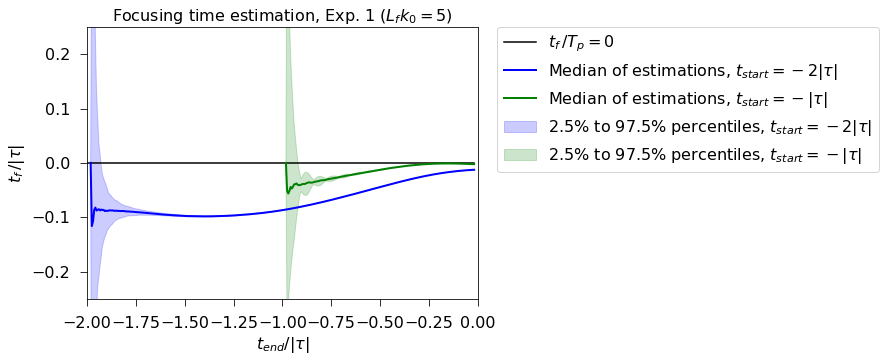

In [16]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]/np.abs(tau),np.zeros(len(t[nstart1:nend])),'k',label=r'$t_{f}\, /T_p=0$')

# valeur médiane
ax.plot(t[nstart1+2:nend]/np.abs(tau), np.median(TFOC1,axis=0)[nstart1+2:nend]/np.abs(tau), '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart2+2:nend]/np.abs(tau), np.median(TFOC2,axis=0)[nstart2+2:nend]/np.abs(tau), '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# quantiles à 2.5% et 97.5%
ax.fill_between(t[nstart1+2:nend]/np.abs(tau), np.percentile(TFOC1,axis=0,q=2.5)[nstart1+2:nend]/np.abs(tau),
                np.percentile(TFOC1,axis=0,q=97.5)[nstart1+2:nend]/np.abs(tau),
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')

ax.fill_between(t[nstart2+2:nend]/np.abs(tau), np.percentile(TFOC2,axis=0,q=2.5)[nstart2+2:nend]/np.abs(tau),
                np.percentile(TFOC2,axis=0,q=97.5)[nstart2+2:nend]/np.abs(tau),
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ax.set_title(r'Focusing time estimation, Exp. 1 ($L_f k_0=5$)',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel(r'$t_{f}\, /|\tau|$',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
ax.set_ylim([-0.25,0.25])
ax.set_xlim([-2,0])
fig.set_size_inches([7,5])
plt.show()

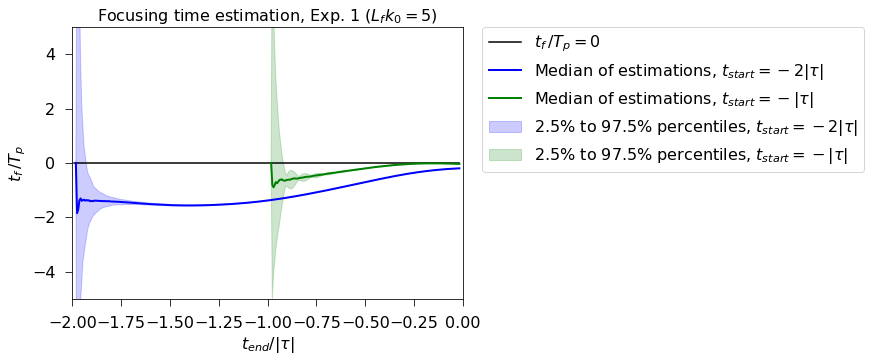

In [17]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]/np.abs(tau),np.zeros(len(t[nstart1:nend])),'k',label=r'$t_{f}\, /T_p=0$')

# valeur médiane
ax.plot(t[nstart1+2:nend]/np.abs(tau), np.median(TFOC1,axis=0)[nstart1+2:nend]*c0*k0/(2*np.pi), '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart2+2:nend]/np.abs(tau), np.median(TFOC2,axis=0)[nstart2+2:nend]*c0*k0/(2*np.pi), '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# quantiles à 2.5% et 97.5%
ax.fill_between(t[nstart1+2:nend]/np.abs(tau), np.percentile(TFOC1,axis=0,q=2.5)[nstart1+2:nend]*c0*k0/(2*np.pi),
                np.percentile(TFOC1,axis=0,q=97.5)[nstart1+2:nend]*c0*k0/(2*np.pi),
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')

ax.fill_between(t[nstart2+2:nend]/np.abs(tau), np.percentile(TFOC2,axis=0,q=2.5)[nstart2+2:nend]*c0*k0/(2*np.pi),
                np.percentile(TFOC2,axis=0,q=97.5)[nstart2+2:nend]*c0*k0/(2*np.pi),
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ax.set_title(r'Focusing time estimation, Exp. 1 ($L_f k_0=5$)',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel('$t_{f}\, /T_p$',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
ax.set_ylim([-5,5])
ax.set_xlim([-2,0])
fig.set_size_inches([7,5])
plt.show()

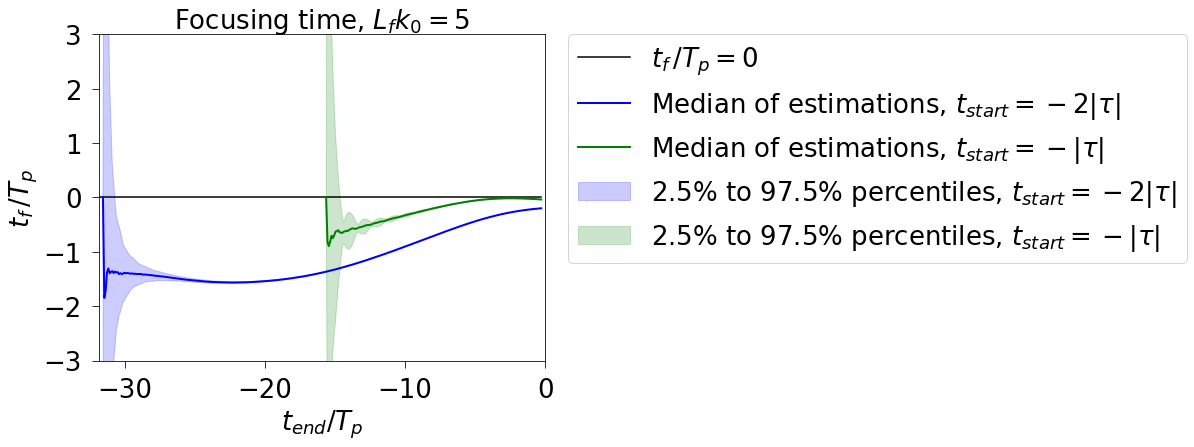

In [18]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]*c0*k0/(2*np.pi),np.zeros(len(t[nstart1:nend])),'k',label=r'$t_{f}\, /T_p=0$')


# médiane
ax.plot(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.median(TFOC1,axis=0)[nstart1+2:nend]*c0*k0/(2*np.pi), '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.median(TFOC2,axis=0)[nstart2+2:nend]*c0*k0/(2*np.pi), '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# intervalle de confiance à 95% (dans to cas entre le quantile 2.5% et 97.5%)
ax.fill_between(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.percentile(TFOC1,axis=0,q=2.5)[nstart1+2:nend]*c0*k0/(2*np.pi),
                np.percentile(TFOC1,axis=0,q=97.5)[nstart1+2:nend]*c0*k0/(2*np.pi),
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')
ax.fill_between(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.percentile(TFOC2,axis=0,q=2.5)[nstart2+2:nend]*c0*k0/(2*np.pi),
                np.percentile(TFOC2,axis=0,q=97.5)[nstart2+2:nend]*c0*k0/(2*np.pi),
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ftsz=26

ax.set_title(r'Focusing time, $L_f k_0=5$',fontsize=ftsz)
ax.set_xlabel(r'$t_{end}/T_p$',fontsize=ftsz)
ax.set_ylabel('$t_{f}\, /T_p$',fontsize=ftsz)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=ftsz)
ax.tick_params(length=7,labelsize=ftsz,direction='out',pad=10)
ax.set_ylim([-3,3])
ax.set_xlim([-2*np.abs(tau)*c0*k0/(2*np.pi),0])
fig.set_size_inches([8,6])
plt.show()

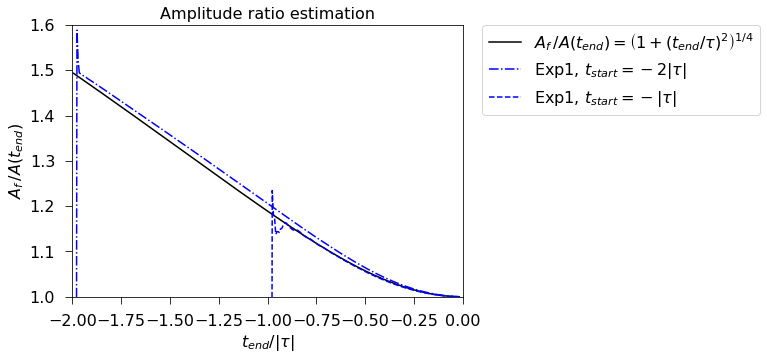

In [17]:
# Avec un seul fichier
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)
ax.plot(t[nstart1:nend]/np.abs(tau),(1+(t[nstart1:nend]/tau)**2)**0.25,'k',
        label=r'$A_{f}\, /A(t_{end})=\left(1+\left(t_{end}/\tau\right)^2\right)^{1/4}$')
ax.plot(t[nstart1+2:nend]/np.abs(tau),data['A_ratio1'][nstart1+2:nend],'-.b',label=r'Exp1, $t_{start}=-2|\tau|$')
ax.plot(t[nstart2+2:nend]/np.abs(tau),data['A_ratio2'][nstart2+2:nend],'--b',label=r'Exp1, $t_{start}=-|\tau|$')
ax.set_ylim([1,1.6])
ax.set_xlim([-2,0])
ax.set_title('Amplitude ratio estimation',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel(r'$A_{f}\, /A(t_{end})$',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
fig.set_size_inches([7,5])
plt.show()

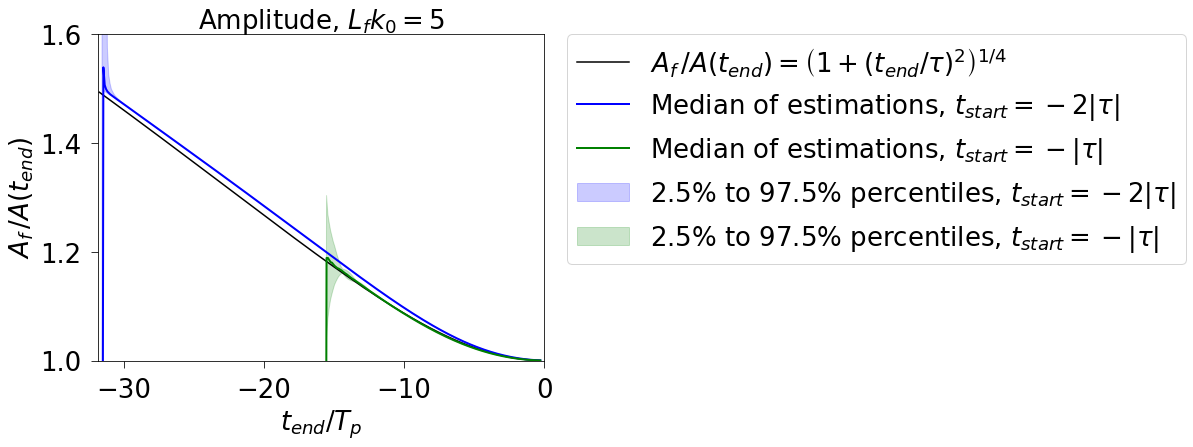

In [19]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]*c0*k0/(2*np.pi),(1+(t[nstart1:nend]/tau)**2)**0.25,'k',
        label=r'$A_{f}\, /A(t_{end})=\left(1+\left(t_{end}/\tau\right)^2\right)^{1/4}$')

# valeur moyenne
ax.plot(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.median(ARATIO1,axis=0)[nstart1+2:nend], '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.median(ARATIO2,axis=0)[nstart2+2:nend], '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# intervalle de confiance à 95% (dans to cas entre le quantile 2.5% et 97.5%)
ax.fill_between(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.percentile(ARATIO1,axis=0,q=2.5)[nstart1+2:nend],
                np.percentile(ARATIO1,axis=0,q=97.5)[nstart1+2:nend],
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')
ax.fill_between(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.percentile(ARATIO2,axis=0,q=2.5)[nstart2+2:nend],
                np.percentile(ARATIO2,axis=0,q=97.5)[nstart2+2:nend],
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ftsz=26

ax.set_title(r'Amplitude, $L_f k_0=5$',fontsize=ftsz)
ax.set_xlabel(r'$t_{end}/T_p$',fontsize=ftsz)
ax.set_ylabel(r'$A_{f}\, /A(t_{end})$',fontsize=ftsz)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=ftsz)
ax.tick_params(length=7,labelsize=ftsz,direction='out',pad=10)
ax.set_ylim([1,1.6])
ax.set_xlim([-2*np.abs(tau)*c0*k0/(2*np.pi),0])
fig.set_size_inches([8,6])
plt.show()

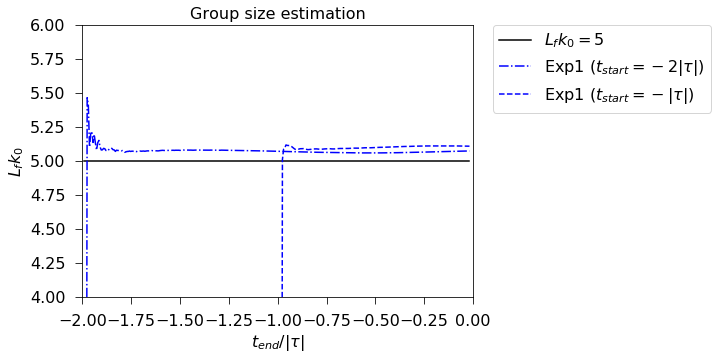

In [20]:
# Avec un seul fichier
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)
ax.plot(t[nstart1:nend]/np.abs(tau),k0*L*np.ones(len(t[nstart1:nend])),'k',label=r'$L_{f}k_0=5$')
ax.plot(t[nstart1+2:nend]/np.abs(tau),k0*data['L1'][nstart1+2:nend],'-.b',label=r'Exp1 ($t_{start}=-2|\tau|$)')
ax.plot(t[nstart2+2:nend]/np.abs(tau),k0*data['L2'][nstart2+2:nend],'--b',label=r'Exp1 ($t_{start}=-|\tau|$)')
ax.set_ylim([4,6])
ax.set_xlim([-2,0])
ax.set_title('Group size estimation',fontsize=16)
ax.set_xlabel(r'$t_{end}/|\tau|$',fontsize=16)
ax.set_ylabel(r'$L_{f}k_0 $',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.tick_params(length=7,labelsize=16,direction='out',pad=10)
fig.set_size_inches([7,5])
plt.show()

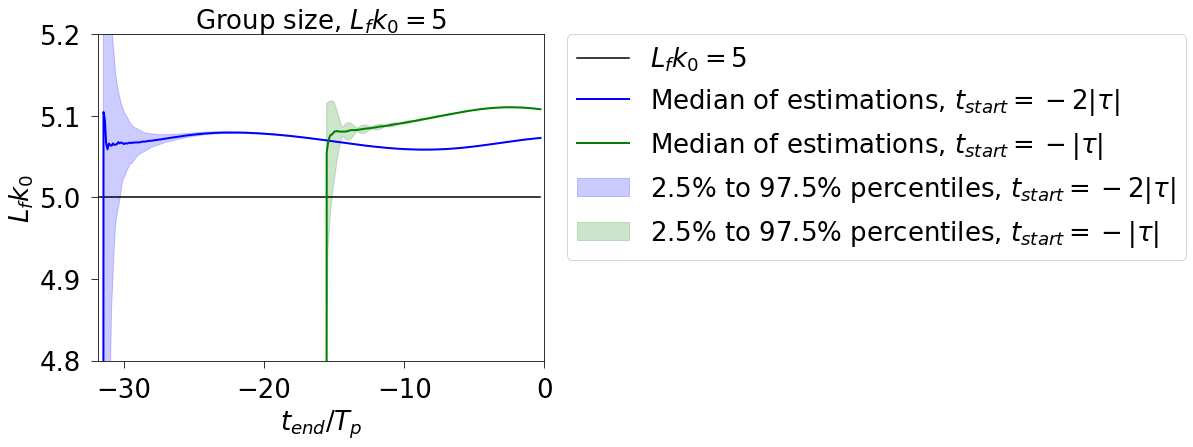

In [22]:
# Avec plusieurs fichiers
plt.clf(); fig=plt.figure(); fig.add_axes(); ax=fig.add_subplot(111)

# Objectif
ax.plot(t[nstart1:nend]*c0*k0/(2*np.pi),k0*L*np.ones(len(t[nstart1:nend])),'k',label=r'$L_{f}k_0=5$')

# valeur moyenne
ax.plot(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.median(LL1,axis=0)[nstart1+2:nend]*k0, '-b',
        linewidth=2,label=r'Median of estimations, $t_{start}=-2|\tau|$')
ax.plot(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.median(LL2,axis=0)[nstart2+2:nend]*k0, '-g',
        linewidth=2,label=r'Median of estimations, $t_{start}=-|\tau|$')

# intervalle de confiance à 95% (dans to cas entre le quantile 2.5% et 97.5%)
ax.fill_between(t[nstart1+2:nend]*c0*k0/(2*np.pi), np.percentile(LL1,axis=0,q=2.5)[nstart1+2:nend]*k0,
                np.percentile(LL1,axis=0,q=97.5)[nstart1+2:nend]*k0,
                color='b', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-2|\tau|$')
ax.fill_between(t[nstart2+2:nend]*c0*k0/(2*np.pi), np.percentile(LL2,axis=0,q=2.5)[nstart2+2:nend]*k0,
                np.percentile(LL2,axis=0,q=97.5)[nstart2+2:nend]*k0,
                color='g', alpha=.2, label=r'2.5% to 97.5% percentiles, $t_{start}=-|\tau|$')

ftsz=26

ax.set_ylim([4.8,5.2])
ax.set_xlim([-2*np.abs(tau)*c0*k0/(2*np.pi),0])
ax.set_title(r'Group size, $L_f k_0=5$',fontsize=ftsz)
ax.set_xlabel(r'$t_{end}/T_p$',fontsize=ftsz)
ax.set_ylabel(r'$L_{f}k_0 $',fontsize=ftsz)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=ftsz)
ax.tick_params(length=7,labelsize=ftsz,direction='out',pad=10)
fig.set_size_inches([8,6])
plt.show()